<a href="https://colab.research.google.com/github/aisudev/Fashion-MNIST-CNN/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN with Fashion MNIST Dataset

## Setup

In [26]:
!pip install --upgrade gdown
!gdown --id 1VzgqdNgtkpfGAbsG2Sfcocnas81IW115

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1VzgqdNgtkpfGAbsG2Sfcocnas81IW115
To: /content/fashion_mnist.zip
100% 39.6M/39.6M [00:00<00:00, 265MB/s]


In [27]:
!unzip -o ./fashion_mnist.zip

Archive:  ./fashion_mnist.zip
  inflating: fashion-mnist_train.csv  
  inflating: fashion-mnist_test.csv  


## Preprocessing

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [29]:
train_df = pd.read_csv('./fashion-mnist_train.csv')
test_df = pd.read_csv('./fashion-mnist_test.csv')
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train_df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [32]:
train_labels = train_df.label.to_numpy()
train_df.drop(['label'], axis=1, inplace=True)

test_labels = test_df.label.to_numpy()
test_df.drop(['label'], axis=1, inplace=True)

train_labels.shape, test_labels.shape, np.unique(train_labels)

((60000,), (10000,), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [33]:
def oneHotEncoder(labels):
    labels = labels.reshape(-1, 1).ravel()
    labels = np.eye(np.unique(labels).shape[0])[np.array(labels, dtype=np.uint)]
    return labels
    

In [34]:
train_labels = oneHotEncoder(train_labels)
train_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [35]:
test_labels = oneHotEncoder(test_labels)
test_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [36]:
def preprocess(data:np.ndarray):
    data = np.dstack([data] * 3)
    data = data.reshape(-1, 28, 28, 3)
    return data / 255.

In [37]:
train_images = train_df.to_numpy()
train_images = preprocess(train_images)

test_images = test_df.to_numpy()
test_images = preprocess(test_images)

train_images.shape, test_images.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [38]:
def random_display(data:np.ndarray, label:np.ndarray):
    rand_ind = np.random.randint(0, data.shape[0], 10)
    _, axs = plt.subplots(2, 5, figsize=(20, 10))
    n = 0
    
    for row in axs:
        for col in row:
            col.set_title(np.argmax(label[n]))
            col.imshow(data[rand_ind[n]])
            n += 1
            
    plt.show()

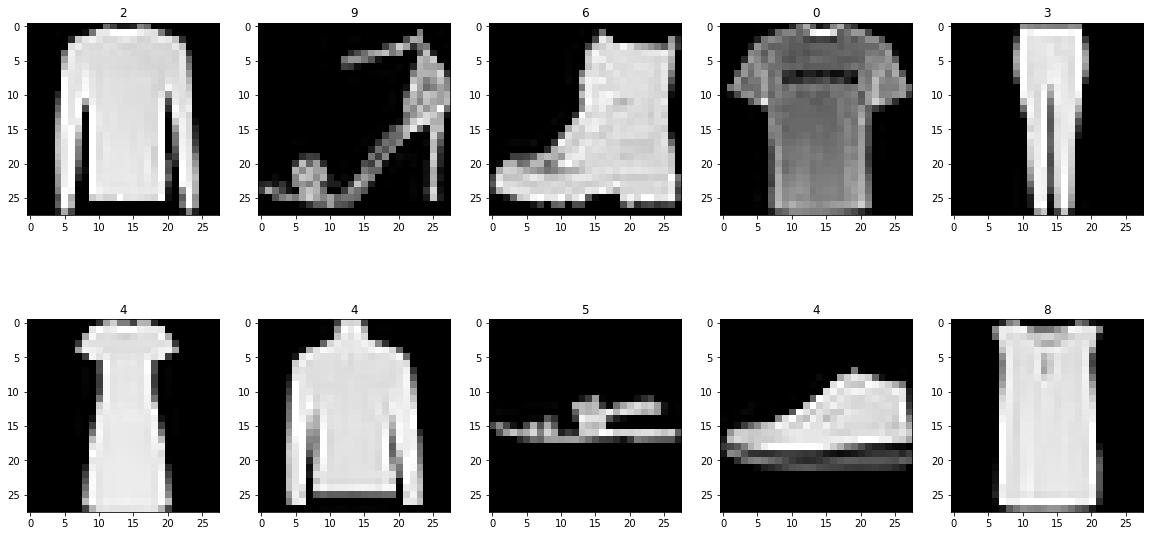

In [39]:
random_display(train_images, train_labels)

In [40]:
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=.2)
train_images.shape, val_images.shape, train_labels.shape, val_labels.shape

((48000, 28, 28, 3), (12000, 28, 28, 3), (48000, 10), (12000, 10))

## Modeling

In [41]:
from tensorflow.keras import layers, Sequential

In [42]:
model = Sequential([
    layers.Input(shape=(28, 28, 3)),
    
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoints = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [46]:
epochs = 20
history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(val_images, val_labels), callbacks=[checkpoints])

Epoch 1/20
1500/1500 [==============================] - ETA: 0s - loss: 0.7436 - accuracy: 0.7154
Epoch 1: val_accuracy improved from -inf to 0.83783, saving model to best_model.h5
1500/1500 [==============================] - 16s 10ms/step - loss: 0.7436 - accuracy: 0.7154 - val_loss: 0.4173 - val_accuracy: 0.8378
Epoch 2/20
1500/1500 [==============================] - ETA: 0s - loss: 0.3925 - accuracy: 0.8588
Epoch 2: val_accuracy improved from 0.83783 to 0.86567, saving model to best_model.h5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3925 - accuracy: 0.8588 - val_loss: 0.3719 - val_accuracy: 0.8657
Epoch 3/20
1495/1500 [============================>.] - ETA: 0s - loss: 0.3325 - accuracy: 0.8814
Epoch 3: val_accuracy improved from 0.86567 to 0.88133, saving model to best_model.h5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3321 - accuracy: 0.8816 - val_loss: 0.3519 - val_accuracy: 0.8813
Epoch 4/20
1495/1500 [========================

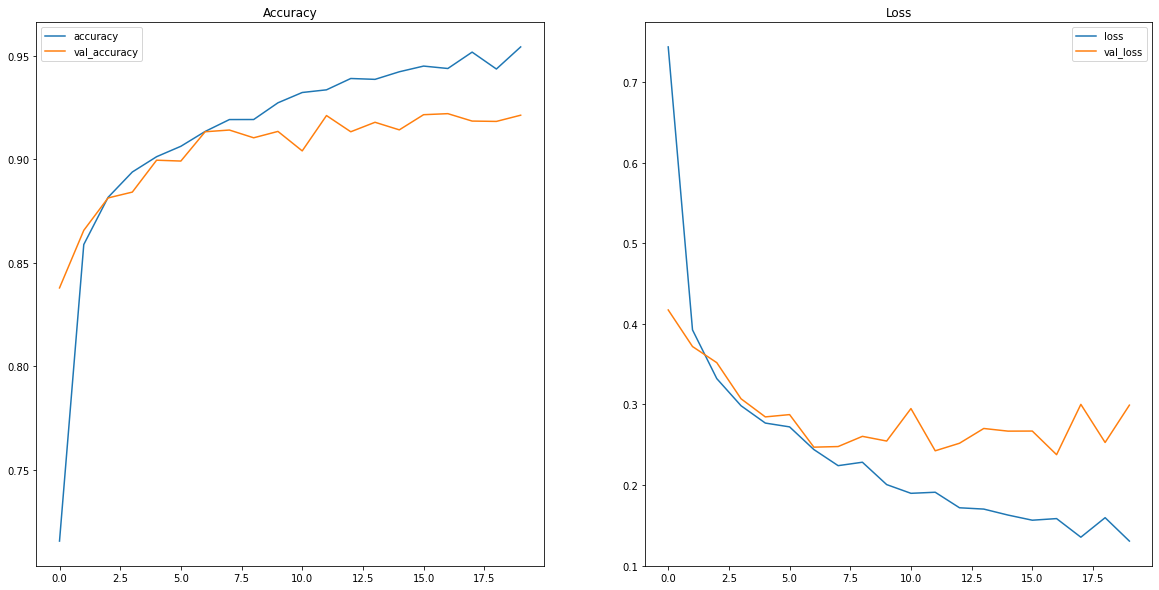

In [47]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.plot(history.epoch, history.history['accuracy'] )
ax1.plot(history.epoch, history.history['val_accuracy'] )
ax1.set_title('Accuracy')
ax1.legend(['accuracy', 'val_accuracy'])

ax2.plot(history.epoch, history.history['loss'] )
ax2.plot(history.epoch, history.history['val_loss'] )
ax2.set_title('Loss')
ax2.legend(['loss', 'val_loss'])

plt.show()

In [48]:
pred_labels = model.predict(test_images)
pred_labels = [np.argmax(a) for a in pred_labels]
pred_labels[:10]

[0, 1, 2, 2, 3, 6, 8, 6, 5, 0]

In [49]:
test_labels = [np.argmax(a) for a in test_labels]
test_labels[:10]

[0, 1, 2, 2, 3, 2, 8, 6, 5, 0]

In [50]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       1.00      0.99      1.00      1000
           2       0.92      0.85      0.89      1000
           3       0.92      0.95      0.94      1000
           4       0.88      0.89      0.88      1000
           5       0.97      0.99      0.98      1000
           6       0.78      0.78      0.78      1000
           7       0.97      0.96      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

